## 1. Svd


In [4]:
import numpy as np
from sklearn.utils.extmath import randomized_svd as svd
from sklearn.cluster import SpectralClustering as SC
from sklearn.mixture import GaussianMixture as Gauss
from sklearn.cluster import AffinityPropagation as AP
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import rand_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from adjustText import adjust_text

In [5]:
# 1. how to choose d in svd, how do I know it's good or bad
# 2. how to compare interms of results, MSE but labbing assumptions
# 2. why in some method embeded data seems give worse approx
# 3. overfitting problem in AffinityPropagation, or just bad choice of algorithm

In [6]:
# read files
with open('adjacency.txt') as file:
    lines = file.readlines()

with open('mp_labels.txt') as file:
    lines_2 = file.readlines()

with open('parties.txt') as file:
    lines_3 = file.readlines()



In [7]:
k = [a[:-1] for a in lines_2]
'10' in k

True

In [8]:
# find Oliver Dowden, row number starts from 1 and include the title
# con Oliver Dowden, lab Debbie	Abrahams, snp Hannah Bardell, LDem Alistair Carmichael, DUP Carla Lockhart
# SF Mickey, Independent Margaret, PC, SDLP, Alba, SPK Lindsay, Green Caroline, Alliance Stephen Farry
with open('mps.txt',"r",encoding="utf-8") as a_file:
    for row_number, line in enumerate(a_file, start=1):
        if 'Farry' in line:
            print(row_number)

210


In [9]:
examplar = {'con':174, 'lab': 1, 'snp': 32, 'pc': 659, 'SDLP': 186, 'Alba':280, 'LDem': 95, 'DUP': 391, 'SF': 62, 
            'Independent': 212, 'SPK': 319, 'Green':400, 'Alliance': 208 }

In [10]:
A = []
for line in lines:
    line = line.split()
    line = [int(a) for a in line]
    A.append(line)

t_labels = [int(a[:-1]) for a in lines_2]
t_labels = np.array(t_labels)

parties = [a[:-1] for a in lines_3]

In [11]:
#obtain the raw adjacency matrix
A = np.array(A)
A.shape #The shape is correct

(674, 794)

In [12]:
U, S, Vh = svd(A, 600) # not sure 600 is a good number 
S = np.diag(S)
U.shape, S.shape, Vh.shape

((674, 600), (600, 600), (600, 794))

In [13]:
X = U@S**(0.5)
Y = S**(0.5)@Vh
X.shape, Y.shape

((674, 600), (600, 794))

In [11]:
"""li_1 = []
for a in range(1,677):
    U, S, Vh = svd(A, a)
    S = np.diag(S)
    X_ = U@S**(0.5)
    result = Gauss(n_components=13, random_state=100
                  ).fit_predict(X_)
    li_1.append(rand_score(t_labels,result))"""

'li_1 = []\nfor a in range(1,677):\n    U, S, Vh = svd(A, a)\n    S = np.diag(S)\n    X_ = U@S**(0.5)\n    result = Gauss(n_components=13, random_state=100\n                  ).fit_predict(X_)\n    li_1.append(rand_score(t_labels,result))'

In [12]:
"""plt.plot(range(1,677), li_1)
plt.title('optimization SVD untruncated using GMM')"""

"plt.plot(range(1,677), li_1)\nplt.title('optimization SVD untruncated using GMM')"

In [13]:
"""print(max(li))
inde = li.index(max(li))
dex = [a for a in range(1,677)]
dex[inde]"""

'print(max(li))\ninde = li.index(max(li))\ndex = [a for a in range(1,677)]\ndex[inde]'

In [14]:
"""li_2 = []
for a in range(1,677):
    U, S, Vh = svd(A, a)
    S = np.diag(S)
    X_ = U@S**(0.5)
    result = SC(n_clusters=13, n_components=13, random_state=100
                  ).fit_predict(X_)
    li_2.append(rand_score(t_labels,result))"""

'li_2 = []\nfor a in range(1,677):\n    U, S, Vh = svd(A, a)\n    S = np.diag(S)\n    X_ = U@S**(0.5)\n    result = SC(n_clusters=13, n_components=13, random_state=100\n                  ).fit_predict(X_)\n    li_2.append(rand_score(t_labels,result))'

In [15]:
"""plt.plot(range(1,677), li_2)
plt.title('optimization of SVD untruncated using spectal clustering')"""

"plt.plot(range(1,677), li_2)\nplt.title('optimization of SVD untruncated using spectal clustering')"

In [16]:
"""print(max(li))
inde = li.index(max(li))
dex = [a for a in range(1,677)]
dex[inde]"""

'print(max(li))\ninde = li.index(max(li))\ndex = [a for a in range(1,677)]\ndex[inde]'

## Data truncation


In [14]:
remo = []
for i in range(0,674):
    if t_labels[i] > 4:
        remo.append(i)
len(remo)

25

In [15]:
A_1 = np.delete(A, remo, 0)
A_1.shape # now cluster into 6

(649, 794)

In [16]:
t_labels_1 = np.delete(t_labels, remo, 0)
t_labels_1.shape

(649,)

In [17]:
U, S, Vh = svd(A_1, 2)
S = np.diag(S)
X_1 = U@S**(0.5)

### optimization again

In [21]:
"""li_3 = []
for a in range(2,600):
    U, S, Vh = svd(A_1, a)
    S = np.diag(S)
    X_ = U@S**(0.5)
    print(X_.shape)
    result = SC(n_clusters=6, n_components=6, random_state=100
                  ).fit_predict(X_)
    li_3.append(rand_score(t_labels_1,result))"""

'li_3 = []\nfor a in range(2,600):\n    U, S, Vh = svd(A_1, a)\n    S = np.diag(S)\n    X_ = U@S**(0.5)\n    print(X_.shape)\n    result = SC(n_clusters=6, n_components=6, random_state=100\n                  ).fit_predict(X_)\n    li_3.append(rand_score(t_labels_1,result))'

In [22]:
"""plt.plot(range(2,600), li_3)
plt.title('truncated optimization based on Spectal clustering')
print(max(li_3))
inde = li_3.index(max(li_3))
dex = [a for a in range(1,677)]
dex[inde]"""

"plt.plot(range(2,600), li_3)\nplt.title('truncated optimization based on Spectal clustering')\nprint(max(li_3))\ninde = li_3.index(max(li_3))\ndex = [a for a in range(1,677)]\ndex[inde]"

In [23]:
"""li_4 = []
for a in range(1,677):
    U, S, Vh = svd(A_1, a)
    S = np.diag(S)
    X_ = U@S**(0.5)
    print(a)
    result = Gauss(n_components=6, random_state=100
                  ).fit_predict(X_)
    li_4.append(rand_score(t_labels_1,result))"""

'li_4 = []\nfor a in range(1,677):\n    U, S, Vh = svd(A_1, a)\n    S = np.diag(S)\n    X_ = U@S**(0.5)\n    print(a)\n    result = Gauss(n_components=6, random_state=100\n                  ).fit_predict(X_)\n    li_4.append(rand_score(t_labels_1,result))'

In [24]:
"""plt.plot(range(1,677), li_4)
plt.title('truncated optimization based on Spectal clustering, GMM')
print(max(li_3))
inde = li_3.index(max(li_3))
dex = [a for a in range(1,677)]
dex[inde]"""

"plt.plot(range(1,677), li_4)\nplt.title('truncated optimization based on Spectal clustering, GMM')\nprint(max(li_3))\ninde = li_3.index(max(li_3))\ndex = [a for a in range(1,677)]\ndex[inde]"

## 2. spectal clustering

### start to use svd for clustering

In [56]:
U, S, Vh = svd(A, 13)
S = np.diag(S)
X = U@S**(0.5)

In [57]:
clustering = SC(n_clusters=13, n_components=13, affinity='nearest_neighbors').fit(X)
# we instead work on X
result = clustering.labels_
rand_score(t_labels, result)

0.7350805331546157

Text(0.5, 0, 'labels')

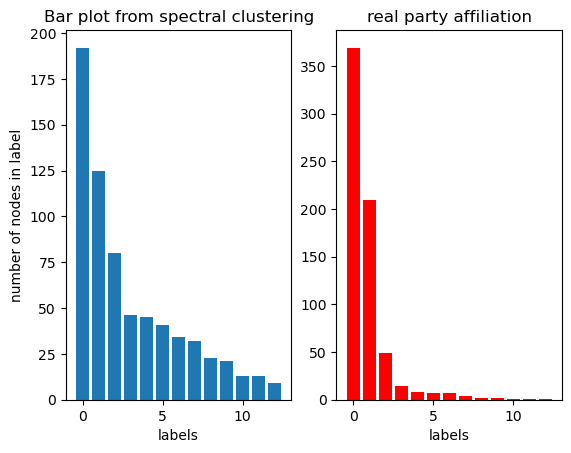

In [58]:
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1,)
plt.title('Bar plot from spectral clustering')
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)
plt.xlabel('labels')
plt.ylabel('number of nodes in label')

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data
plt.title('real party affiliation')
plt.xlabel('labels')

In [ ]:
clustering = SC(n_clusters=4, n_components=4, affinity='nearest_neighbors').fit(X)
# we instead work on X
result = clustering.labels_
X.shape

In [ ]:
hei = []
index = [n for n in range(4)]
result_l = list(result)

plt.subplot(1,2,1)
for n in range(4):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red')

### use the truncated data instead

### try to obtain a mark for clustering in Spectal



In [49]:
result = SC(n_clusters=4, n_components=4, affinity='nearest_neighbors').fit_predict(A)
# use nearest_nei to construct the weighted matrix


[361, 49, 214, 50]

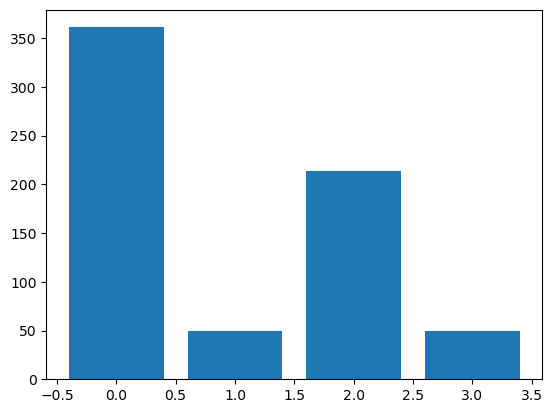

In [50]:
hei = []
index = [n for n in range(4)]
result = list(result)

for n in range(4):
    hei.append(result.count(n))
plt.bar(index, hei)
hei

In [ ]:
t_labels_moded = [] # change the labels so that the other small parties are labeled as 3
for a in t_labels:
    if a <= 2:
        t_labels_moded.append(a)
    else:
        t_labels_moded.append(3)
hei_r = []
for n in range(4):
    hei_r.append(t_labels_moded.count(n))

hei_r

In [ ]:
#assume the value in approx just the default sequence of labels
"""for n in range(len(result)):
    if result[n] == 2:
        result[n] = 1
    elif result[n] == 1:
        result[n] = 3
    elif result[n] == 3:
        result[n] = 3

# use MSE to obtain a score
MSE(t_labels_moded, result)"""

In [ ]:
rand_score(t_labels_l, result)

In [ ]:
result = SC(n_clusters=4, n_components=4, affinity='nearest_neighbors').fit_predict(X)
rand_score(t_labels_l, result) # lower score using embedded method

## 3. GMM

In [ ]:
X.shape

In [ ]:
result = Gauss(n_components=13, random_state=100, covariance_type='full').fit_predict(X)
rand_score(t_labels, result) # good result using GMM

In [ ]:
t_labels.shape

In [ ]:
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1)
plt.title('Bar plot from GMM')
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)
plt.xlabel('labels')
plt.ylabel('number of nodes in label')

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data
plt.title('real party affiliation')
plt.xlabel('labels')

In [ ]:
result = Gauss(n_components=4, random_state=200, covariance_type='full').fit_predict(X)
result # 4 clusters instead 

In [ ]:
hei = []
index = [n for n in range(4)]
result = list(result)

for n in range(4):
    hei.append(result.count(n))
plt.bar(index, hei)
hei

### Raw again?

In [ ]:
result = Gauss(n_components=13, random_state=200, covariance_type='full').fit_predict(A)
result

In [ ]:
# in terms of raw data it does not seem better than the svd 
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

In [ ]:
result = Gauss(n_components=4, random_state=200, covariance_type='full').fit_predict(A)
result

In [ ]:
hei = []
index = [n for n in range(4)]
result = list(result)

for n in range(4):
    hei.append(result.count(n))
plt.bar(index, hei)
hei # seems like good result

## 4. affinity progagation 

In [ ]:
examplar

In [ ]:
# try to find examplars
exam = np.zeros(674)
exam -= 3
for a in examplar:
    exam[examplar[a]] = -1

In [ ]:
result = AP(max_iter=340).fit_predict(X)

In [ ]:
max(result)

In [ ]:
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

In [ ]:
result = AP(preference=exam).fit_predict(X)
print(max(result))


In [ ]:
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)
print(hei)
plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

In [ ]:
eps = np.array(range(1,40))
eps = eps*0.1

In [ ]:
index = 0
while max(result) > 14:
    result = DBSCAN(eps[index]).fit_predict(X)
    index += 1 

## Redo in truncate 2d

In [91]:
U, S, Vh = svd(A_1, 2) # not sure 600 is a good number 
S = np.diag(S)
X_1 = U@S**(0.5)

In [96]:
dic_par = {0:'CON', 1:'Lab', 2:'SNP', 3:'LDem', 4:'DUP', 5:'SF', 6:'Independent', 7:'PC', 8:'SDLP'
          , 9:'Alba', 10:'SPK', 11:'Green', 12:'Alliance'}
par_tex = [dic_par[a] for a in t_labels_1]
par_tex

['Lab',
 'Lab',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'Lab',
 'Lab',
 'CON',
 'Lab',
 'Lab',
 'CON',
 'Lab',
 'CON',
 'CON',
 'CON',
 'CON',
 'Lab',
 'CON',
 'Lab',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'SNP',
 'Lab',
 'CON',
 'CON',
 'Lab',
 'Lab',
 'CON',
 'Lab',
 'CON',
 'CON',
 'CON',
 'Lab',
 'CON',
 'SNP',
 'SNP',
 'CON',
 'SNP',
 'Lab',
 'Lab',
 'CON',
 'CON',
 'SNP',
 'CON',
 'CON',
 'Lab',
 'CON',
 'CON',
 'Lab',
 'CON',
 'CON',
 'Lab',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'SNP',
 'CON',
 'Lab',
 'Lab',
 'SNP',
 'CON',
 'CON',
 'Lab',
 'CON',
 'Lab',
 'CON',
 'CON',
 'Lab',
 'CON',
 'CON',
 'Lab',
 'Lab',
 'Lab',
 'Lab',
 'CON',
 'SNP',
 'SNP',
 'Lab',
 'DUP',
 'Lab',
 'LDem',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'LDem',
 'Lab',
 'SNP',
 'Lab',
 'SNP',
 'CON',
 'CON',
 'CON',
 'CON',
 'Lab',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'CON',
 'Lab',
 'LDem',
 'Lab',
 'Lab',
 'CON',
 'CON

IndexError: list index out of range

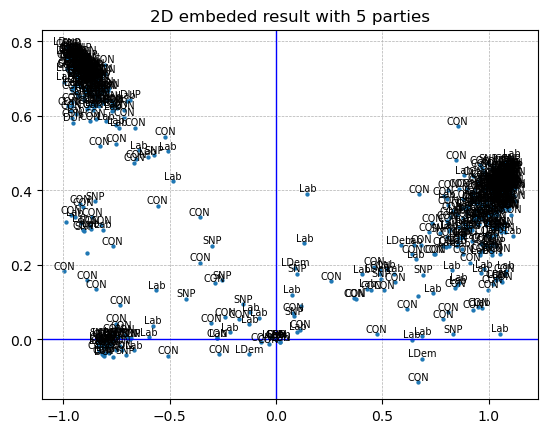

In [98]:
U, S, Vh = svd(A, 2) # not sure 600 is a good number 
S = np.diag(S)
X = U@S**(0.5)
par_tex_full = [dic_par[a] for a in t_labels_1]
plt.scatter(X[:,0], X[:,1], s=4.5,)
plt.axhline(0, color='blue', linewidth=1) 
plt.axvline(0, color='blue', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.title('2D embeded result with 5 parties')
for i, (x, y) in enumerate(zip(X[:,0], X[:,1])):
    plt.text(x, y, par_tex[i], ha='center', va='bottom', fontsize=7)

0.8468393920371321


219

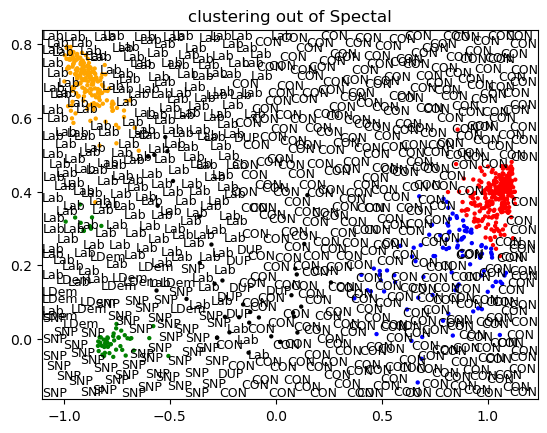

In [17]:
result = SC(n_clusters=5, n_components = 5, random_state=100).fit_predict(X_1) #significantly imporve even in the 2 dimentional case
print(rand_score(t_labels_1, result))

color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]
plt.scatter(X_1[:,0], X_1[:,1], c = lable_color, s=4.5)
plt.title('clustering out of Spectal')


texts = [plt.text(x, y, label, ha='center', va='bottom', fontsize=9) for x, y, label in zip(X_1[:,0], X_1[:,1], par_tex)]
adjust_text(texts)


0.8468393920371321


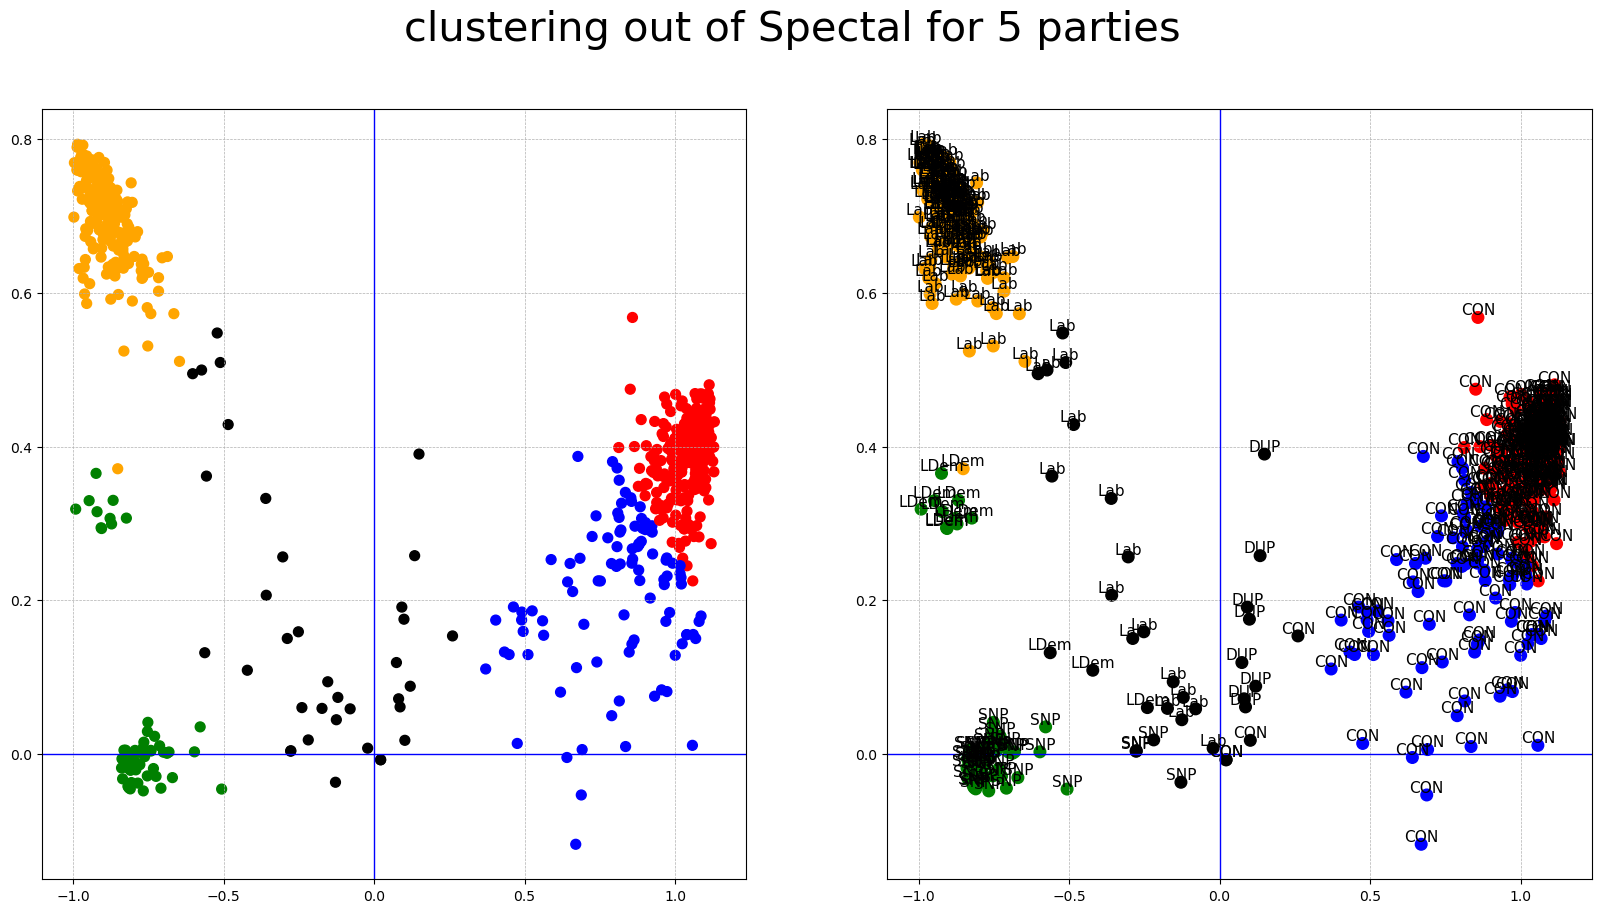

In [111]:
result = SC(n_clusters=5, n_components = 5, random_state=100).fit_predict(X_1) #significantly imporve even in the 2 dimentional case
print(rand_score(t_labels_1, result))

color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('clustering out of Spectal for 5 parties', size=30)

ax2.scatter(X_1[:,0], X_1[:,1], c = lable_color, s=70)
ax2.axhline(0, color='blue', linewidth=1) 
ax2.axvline(0, color='blue', linewidth=1)
ax2.grid(True, linestyle='--', linewidth=0.5)

for i, (x, y) in enumerate(zip(X_1[:,0], X_1[:,1])):
    ax2.text(x, y, par_tex[i], ha='center', va='bottom', fontsize=11) 

ax1.scatter(X_1[:,0], X_1[:,1], c = lable_color, s=50)
ax1.axhline(0, color='blue', linewidth=1) 
ax1.axvline(0, color='blue', linewidth=1)
ax1.grid(True, linestyle='--', linewidth=0.5)

0.8468393920371321


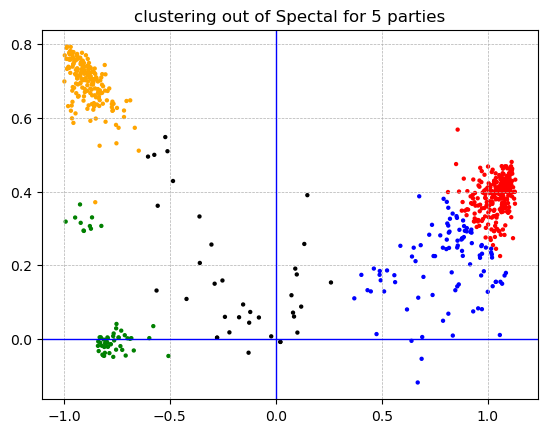

In [93]:
result = SC(n_clusters=5, n_components = 5, random_state=100).fit_predict(X_1) #significantly imporve even in the 2 dimentional case
print(rand_score(t_labels_1, result))

color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]
plt.scatter(X_1[:,0], X_1[:,1], c = lable_color, s=4.5)
plt.title('clustering out of Spectal for 5 parties')
plt.axhline(0, color='blue', linewidth=1) 
plt.axvline(0, color='blue', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5)


[267, 193, 98, 55, 36]


<BarContainer object of 5 artists>

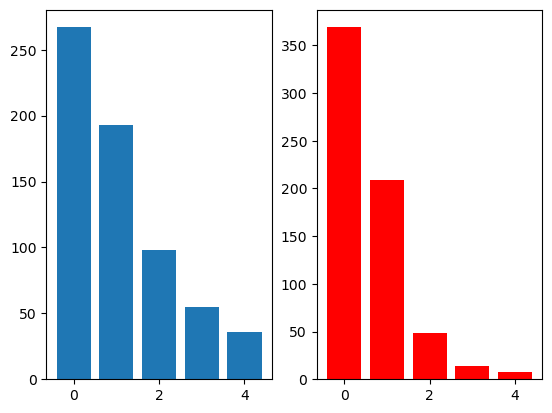

In [23]:
hei = []
index = [n for n in range(5)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(5):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)
print(hei)
plt.subplot(1,2,2)
hei = []
index = [n for n in range(5)]
t_labels_l = list(t_labels_1)
for n in range(5):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

0.786133462687135


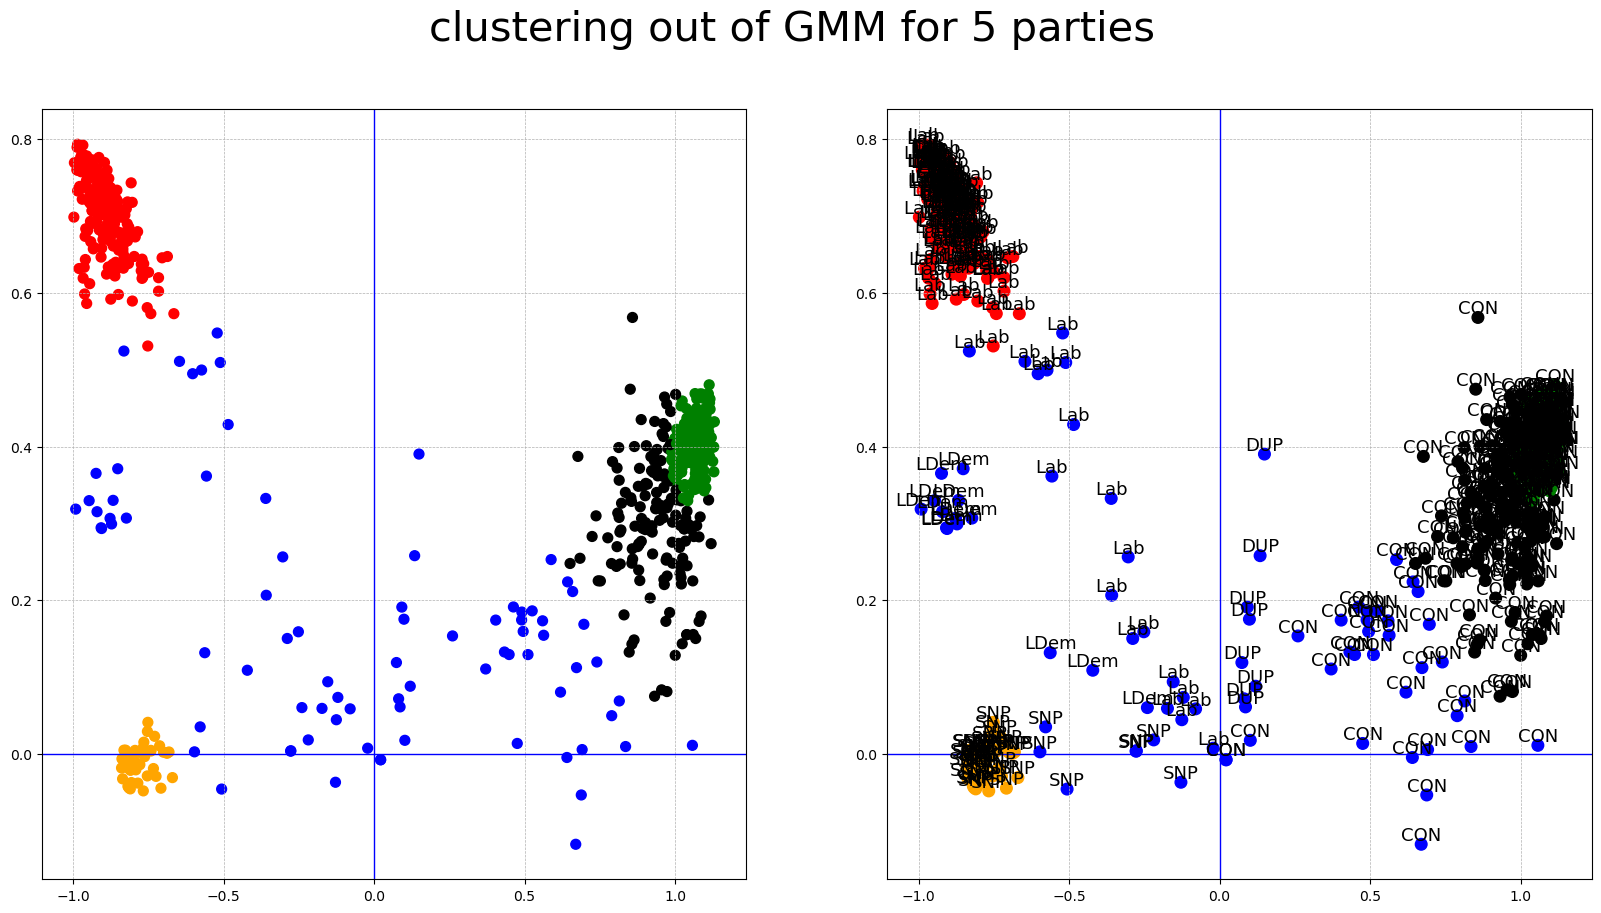

In [112]:
result = Gauss( n_components = 5, random_state=100).fit_predict(X_1) #significantly imporve even in the 2 dimentional case
print(rand_score(t_labels_1, result))

color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('clustering out of GMM for 5 parties', size=30)

ax2.scatter(X_1[:,0], X_1[:,1], c = lable_color, s=70)
ax2.axhline(0, color='blue', linewidth=1) 
ax2.axvline(0, color='blue', linewidth=1)
ax2.grid(True, linestyle='--', linewidth=0.5)

for i, (x, y) in enumerate(zip(X_1[:,0], X_1[:,1])):
    ax2.text(x, y, par_tex[i], ha='center', va='bottom', fontsize=13) 

ax1.scatter(X_1[:,0], X_1[:,1], c = lable_color, s=50)
ax1.axhline(0, color='blue', linewidth=1) 
ax1.axvline(0, color='blue', linewidth=1)
ax1.grid(True, linestyle='--', linewidth=0.5) 

In [25]:
U, S, Vh = svd(A_1, 3) # not sure 600 is a good number 
S = np.diag(S)
X_2 = U@S**(0.5)

0.8614344956152866


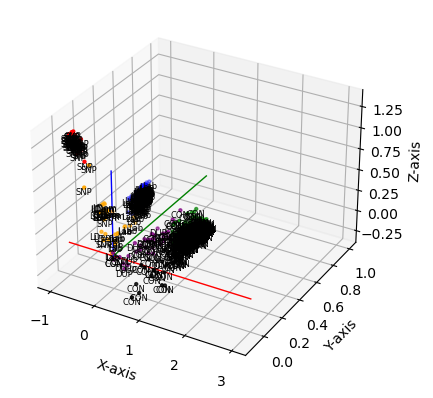

In [38]:
result = SC(n_clusters=6, n_components = 6, random_state=100).fit_predict(X_2) #significantly imporve even in the 2 dimentional case
print(rand_score(t_labels_1, result))

color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_2[:,0], X_2[:,1], X_2[:,2], c = lable_color, s = 4.5)
for i, label in enumerate(par_tex):
    ax.text(X_2[:,0][i], X_2[:,1][i], X_2[:,2][i], label, ha='center', va='top', fontsize=6)

ax.plot([-1, 3], [0, 0], [0, 0], color='red', linewidth=1)  # x-axis
ax.plot([0, 0], [0, 1], [0, 0], color='green', linewidth=1)  # y-axis
ax.plot([0, 0], [0, 0], [0, 1], color='blue', linewidth=1)  # z-axis

# Set axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

## Spherical trans

In [27]:
def spherical_transform(X): #X is our nxm embed-ment matrix, n MPs and latent dimension m
    (a,b) = X.shape
    X1 = np.zeros((a, b-1)) #creating the new matrix that will have the spherical latent coordinates
    for i in range(a): 
        if X[i, 0] >= 0:
            X1[i, 0] = np.arccos((X[i, 1]) / np.linalg.norm(X[i, :2]))
        else:
            X1[i, 0] = 2*np.pi - np.arccos((X[i, 1]) / np.linalg.norm(X[i, :2]))
        for j in range(1, b-1):
            X1[i, j] = 2*np.arccos((X[i, j+1]) / np.linalg.norm(X[i, :(j+2)]))
    return X1

In [28]:
U, S, Vh = svd(A_1, 2) 
S = np.diag(S)
X_2 = U@S**(0.5)
print(X_2.shape)

(649, 2)


In [29]:
spherical_X_1d = spherical_transform(X_2)
result = SC(n_clusters=5, n_components=2, random_state=100).fit_predict(spherical_X_1d)
print(rand_score(t_labels_1, result))

0.9684034316802679


In [30]:
spherical_X_1d_list = [a[0] for a in spherical_X_1d]
spherical_X_1d_list = np.array(spherical_X_1d_list)


In [31]:
r  = np.array([1 for a in range(649)])
r.shape

(649,)

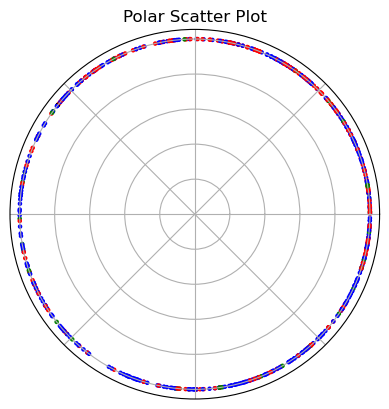

In [32]:
color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.scatter(spherical_X_1d[:,0]*(180/np.pi),  r*10, c=lable_color, cmap='viridis', s= 5)

plt.title("Polar Scatter Plot")
ax.set_xticklabels([])  # Hide theta labels
ax.set_yticklabels([]) 
plt.show()

In [118]:
U, S, Vh = svd(A_1, 3) # not sure 600 is a good number 
S = np.diag(S)
X_2 = U@S**(0.5)
print(X_2.shape)

(649, 3)


In [119]:
spherical_X_2d = spherical_transform(X_2)
result = SC(n_clusters=5, n_components=2, random_state=100).fit_predict(spherical_X_2d)
print(rand_score(t_labels_1, result))

0.9665582377446784


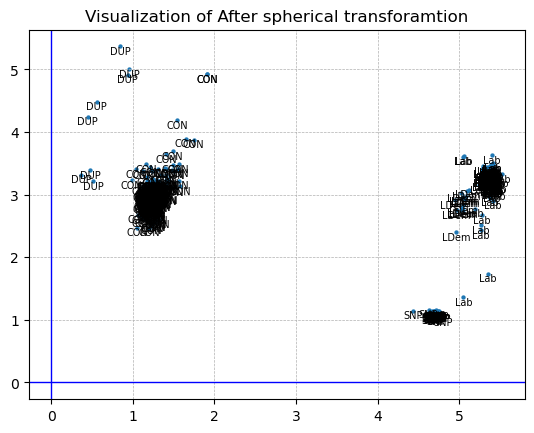

In [120]:
plt.scatter(spherical_X_2d[:,0], spherical_X_2d[:,1], s=4.5)
plt.title('Visualization of After spherical transforamtion')

plt.axhline(0, color='blue', linewidth=1) 
plt.axvline(0, color='blue', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5)
for i, (x, y) in enumerate(zip(spherical_X_2d[:,0], spherical_X_2d[:,1])):
    plt.text(x, y, par_tex[i], ha='center', va='top', fontsize=7, alpha=1)

In [121]:
def spheric2cartesian(r,theta, phi):
    x = r*np.cos(theta) *np.sin(phi)
    y = r*np.sin(theta)*np.sin(phi)
    z= r*np.cos(phi)
    return x, y, z

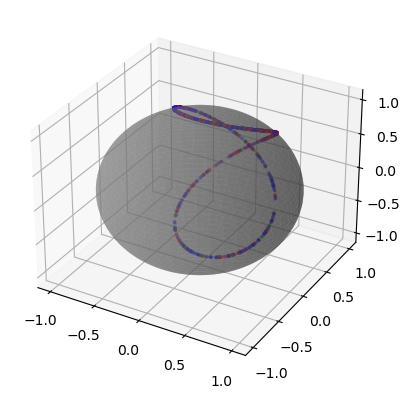

In [39]:
theta = spherical_X_2d[:,0]
theta = theta*(180/np.pi)
phi = spherical_X_2d[:,0]*(180/np.pi)
x, y, z = spheric2cartesian(r, theta,phi)

color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
label_color = [color[i] for i in result]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
a = np.outer(np.cos(u), np.sin(v))
b = np.outer(np.sin(u), np.sin(v))
c = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface of the sphere
ax.plot_surface(a, b, c, color='gray', alpha=0.5)


ax.scatter(x, y, z, c=label_color, s=3)


plt.show()

0.9665582377446784


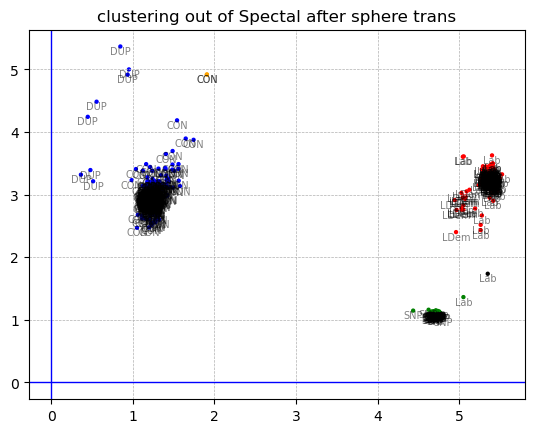

In [122]:
spherical_X_2d = spherical_transform(X_2)
result = SC(n_clusters=5, n_components=2, random_state=100).fit_predict(spherical_X_2d)
print(rand_score(t_labels_1, result))

color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]
plt.scatter(spherical_X_2d[:,0], spherical_X_2d[:,1], c = lable_color, s=4.5)
plt.title('clustering out of Spectal after sphere trans')

plt.axhline(0, color='blue', linewidth=1) 
plt.axvline(0, color='blue', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5)
for i, (x, y) in enumerate(zip(spherical_X_2d[:,0], spherical_X_2d[:,1])):
    plt.text(x, y, par_tex[i], ha='center', va='top', fontsize=7, alpha=0.5) 


(649, 2)
0.9665582377446784


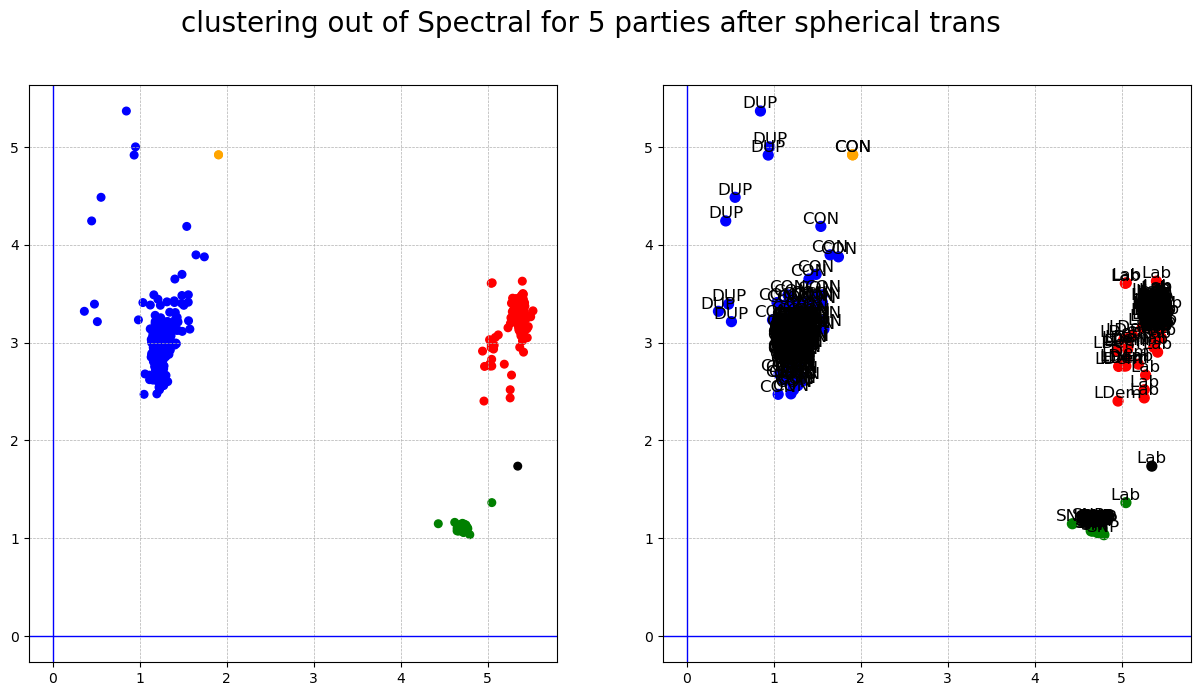

In [125]:
spherical_X_2d = spherical_transform(X_2)
print(spherical_X_2d.shape)
result = SC(n_clusters=5, n_components=2, random_state=100).fit_predict(spherical_X_2d)
print(rand_score(t_labels_1, result))
color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))
fig.suptitle('clustering out of Spectral for 5 parties after spherical trans', size=20)

ax2.scatter(spherical_X_2d[:,0], spherical_X_2d[:,1], c = lable_color, s=50)
ax2.axhline(0, color='blue', linewidth=1) 
ax2.axvline(0, color='blue', linewidth=1)
ax2.grid(True, linestyle='--', linewidth=0.5)

for i, (x, y) in enumerate(zip(spherical_X_2d[:,0], spherical_X_2d[:,1])):
    ax2.text(x, y, par_tex[i], ha='center', va='bottom', fontsize=12) 

ax1.scatter(spherical_X_2d[:,0], spherical_X_2d[:,1], c = lable_color, s=30)
ax1.axhline(0, color='blue', linewidth=1) 
ax1.axvline(0, color='blue', linewidth=1)
ax1.grid(True, linestyle='--', linewidth=0.5) 

In [133]:
spherical_X_2d = spherical_transform(X_2)
result = Gauss(n_components=5, random_state=100).fit_predict(spherical_X_2d)
print(rand_score(t_labels_1, result))

0.9033080332515361


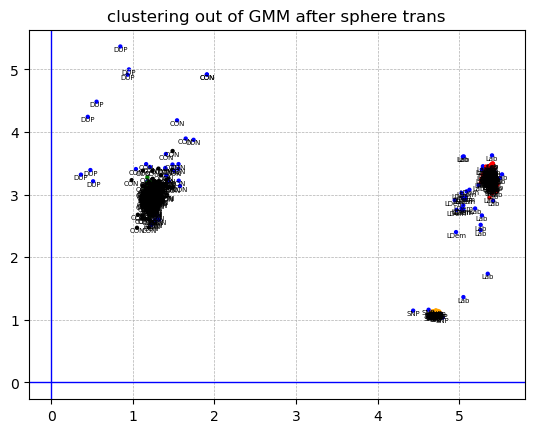

In [113]:
color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]
plt.scatter(spherical_X_2d[:,0], spherical_X_2d[:,1], c = lable_color, s=4.5)
plt.title('clustering out of GMM after sphere trans')

plt.axhline(0, color='blue', linewidth=1) 
plt.axvline(0, color='blue', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5)
for i, (x, y) in enumerate(zip(spherical_X_2d[:,0], spherical_X_2d[:,1])):
    plt.text(x, y, par_tex[i], ha='center', va='top', fontsize=5, color='black') 


0.9033080332515361


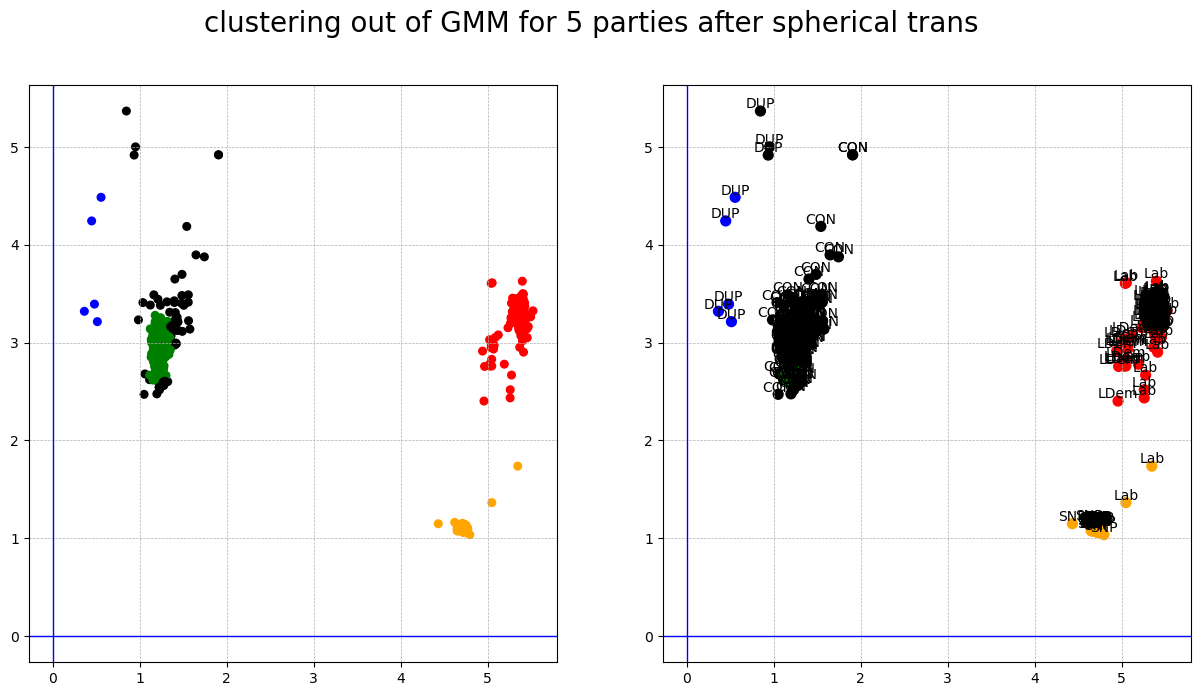

In [126]:
spherical_X_2d = spherical_transform(X_2)
result = Gauss(n_components=5, random_state=100).fit_predict(spherical_X_2d)
print(rand_score(t_labels_1, result))
color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))
fig.suptitle('clustering out of GMM for 5 parties after spherical trans', size=20)

ax2.scatter(spherical_X_2d[:,0], spherical_X_2d[:,1], c = lable_color, s=50)
ax2.axhline(0, color='blue', linewidth=1) 
ax2.axvline(0, color='blue', linewidth=1)
ax2.grid(True, linestyle='--', linewidth=0.5)

for i, (x, y) in enumerate(zip(spherical_X_2d[:,0], spherical_X_2d[:,1])):
    ax2.text(x, y, par_tex[i], ha='center', va='bottom', fontsize=10, alpha=1) 

ax1.scatter(spherical_X_2d[:,0], spherical_X_2d[:,1], c = lable_color, s=30)
ax1.axhline(0, color='blue', linewidth=1) 
ax1.axvline(0, color='blue', linewidth=1)
ax1.grid(True, linestyle='--', linewidth=0.5) 

In [81]:
U, S, Vh = svd(A_1, 5) # not sure 600 is a good number 
S = np.diag(S)
X_2 = U@S**(0.5)
print(X_2.shape)

(649, 5)


In [82]:
spherical_X_2d = spherical_transform(X_2)
print(spherical_X_2d.shape)
result = Gauss(n_components=5, random_state=100).fit_predict(spherical_X_2d)
print(rand_score(t_labels_1, result))

(649, 4)
0.9777340257566246


Text(0.5, 0, 'labels')

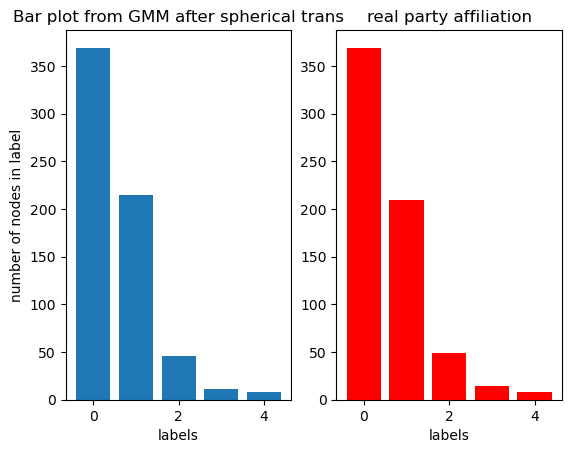

In [83]:
hei = []
index = [n for n in range(5)]
result_l = list(result)
plt.subplot(1,2,1)
plt.title('Bar plot from GMM after spherical trans')
for n in range(5):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)
plt.xlabel('labels')
plt.ylabel('number of nodes in label')

plt.subplot(1,2,2)
hei = []
index = [n for n in range(5)]
t_labels_l = list(t_labels)
for n in range(5):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data
plt.title('real party affiliation')
plt.xlabel('labels')

In [84]:
result = SC(n_clusters=5,n_components=4,random_state=100).fit_predict(spherical_X_2d)
print(rand_score(t_labels_1, result))

0.984853240502958


Text(0.5, 0, 'labels')

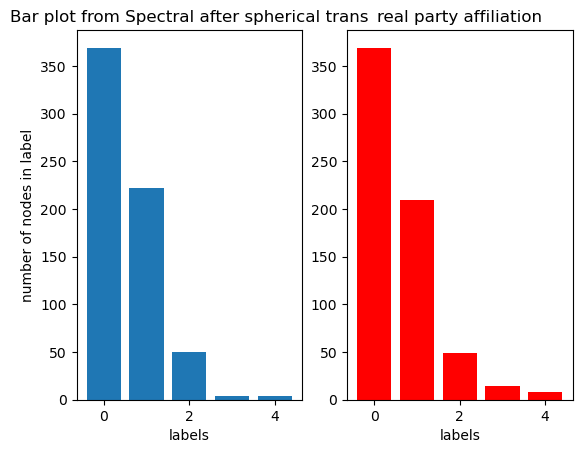

In [85]:
hei = []
index = [n for n in range(5)]
result_l = list(result)
plt.subplot(1,2,1)
plt.title('Bar plot from Spectral after spherical trans')
for n in range(5):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)
plt.xlabel('labels')
plt.ylabel('number of nodes in label')

plt.subplot(1,2,2)
hei = []
index = [n for n in range(5)]
t_labels_l = list(t_labels)
for n in range(5):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data
plt.title('real party affiliation')
plt.xlabel('labels')